In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)

In [11]:
dates = pd.date_range(start='2019-01-01', end='2023-12-31', freq='Q')
labor_force = np.random.randint(1000000, 1500000, size=len(dates))  
unemployed = np.random.randint(20000, 100000, size=len(dates))
unemployed[dates >= '2020-01-01'] += np.random.randint(50000, 200000, size=np.sum(dates >= '2020-01-01'))
unemployment_rate = (unemployed / labor_force) * 100

In [12]:
df = pd.DataFrame({
    'Date': dates,
    'Labor_Force': labor_force,
    'Unemployed': unemployed,
    'Unemployment_Rate': unemployment_rate
})

In [13]:
df.head()

,Date,Labor_Force,Unemployed,Unemployment_Rate
0,2019-03-31,1121958,84820,7.559998
1,2019-06-30,1146867,20769,1.810934
2,2019-09-30,1131932,79735,7.044151
3,2019-12-31,1365838,82955,6.073561
4,2020-03-31,1259178,251141,19.944837


In [14]:
print(df.isnull().sum())

Date                 0
Labor_Force          0
Unemployed           0
Unemployment_Rate    0
dtype: int64


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               20 non-null     datetime64[ns]
 1   Labor_Force        20 non-null     int32         
 2   Unemployed         20 non-null     int32         
 3   Unemployment_Rate  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 612.0 bytes


In [17]:
print(df.describe())

                      Date   Labor_Force     Unemployed  Unemployment_Rate
count                   20  2.000000e+01      20.000000          20.000000
mean   2021-08-15 01:12:00  1.221402e+06  165532.700000          13.568366
min    2019-03-31 00:00:00  1.041090e+06   20769.000000           1.810934
25%    2020-06-07 06:00:00  1.121438e+06  120003.500000           9.812707
50%    2021-08-15 00:00:00  1.183269e+06  146883.000000          13.318672
75%    2022-10-23 00:00:00  1.338483e+06  231937.500000          18.430311
max    2023-12-31 00:00:00  1.475602e+06  255899.000000          23.755199
std                    NaN  1.320881e+05   70967.824136           5.713277


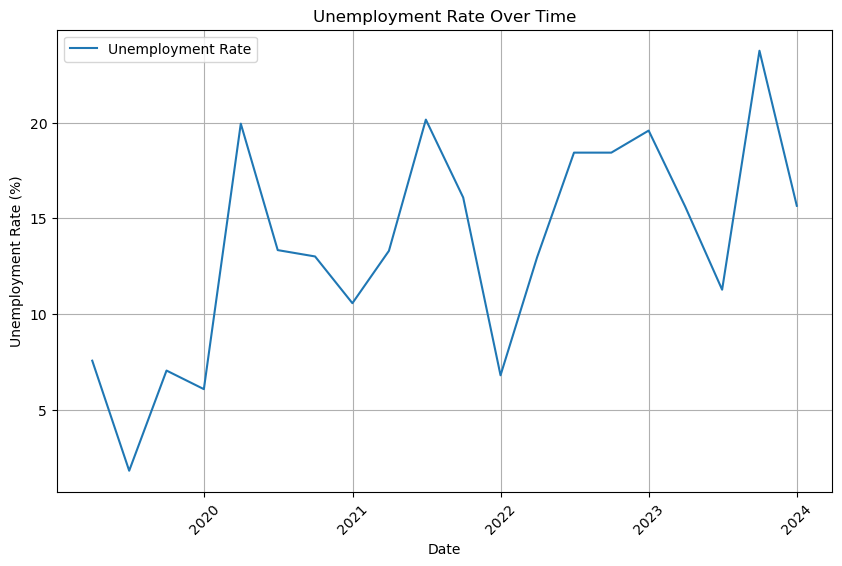

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Unemployment_Rate'], label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

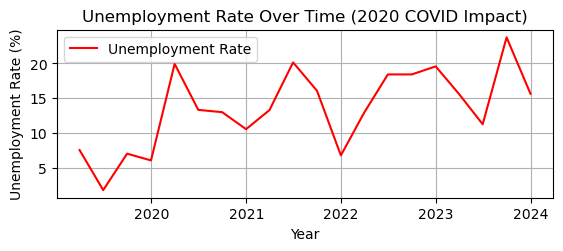

In [20]:
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Unemployment_Rate'], color='red', label='Unemployment Rate')
plt.title('Unemployment Rate Over Time (2020 COVID Impact)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()

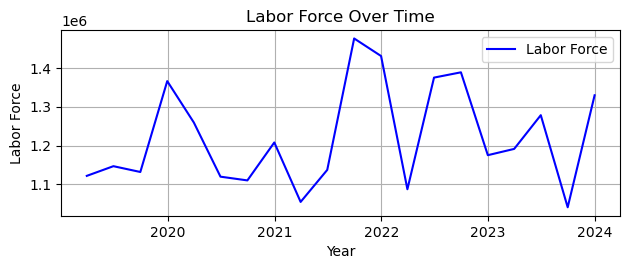

In [23]:
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Labor_Force'], color='blue', label='Labor Force')
plt.title('Labor Force Over Time')
plt.xlabel('Year')
plt.ylabel('Labor Force')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
df['Unemployment_Rate_Change'] = df['Unemployment_Rate'].pct_change() * 100

In [25]:
covid_period = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-12-31')]
print(covid_period[['Date', 'Unemployment_Rate', 'Unemployment_Rate_Change']])

        Date  Unemployment_Rate  Unemployment_Rate_Change
4 2020-03-31          19.944837                228.387877
5 2020-06-30          13.337423                -33.128443
6 2020-09-30          13.006139                 -2.483868
7 2020-12-31          10.563610                -18.779817


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

In [28]:
X = df[['Date_Ordinal']] 
y = df['Unemployment_Rate'] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model: {mse}')

Mean Squared Error of the model: 30.50186309188858


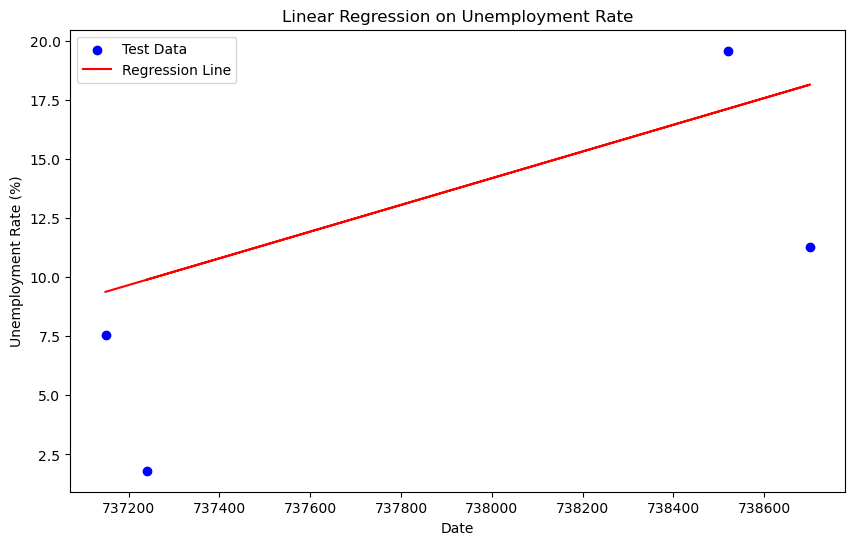

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression on Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()